In [1]:
import pandas as pd
from sqlalchemy import create_engine
from config import DB_USERNAME, DB_PASSWORD, DB_HOST, DB_PORT, DB_NAME
import tabulate
from utils import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
connection_string = f"postgresql+psycopg2://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(connection_string)

In [4]:
df_hr_data = pd.read_sql("SELECT * FROM tbl_hr_data", engine)
df_new_employees = pd.read_sql("SELECT * FROM tbl_new_employees", engine)

In [5]:
print("HR Data:")
print(tabulate(df_hr_data.head(), headers='keys', tablefmt='psql'))
print("\nNew Employees Data:")
print(tabulate(df_new_employees.head(), headers='keys', tablefmt='psql'))

HR Data:
+----+----------------------+-------------------+------------------+------------------------+----------------------+-----------------+--------------------+-------------------------+---------------+----------+---------------+
|    |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |   Work_accident |   Quit_the_Company |   promotion_last_5years | Departments   | salary   | employee_id   |
|----+----------------------+-------------------+------------------+------------------------+----------------------+-----------------+--------------------+-------------------------+---------------+----------+---------------|
|  0 |                 0.38 |              0.53 |                2 |                    157 |                    3 |               0 |                  1 |                       0 | sales         | low      | EMP00001      |
|  1 |                 0.8  |              0.86 |                5 |                    262

In [6]:
df_hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          15000 non-null  float64
 6   Quit_the_Company       15004 non-null  int64  
 7   promotion_last_5years  15004 non-null  int64  
 8   Departments            15004 non-null  object 
 9   salary                 15004 non-null  object 
 10  employee_id            15004 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 1.3+ MB


In [7]:
df_hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           5
average_montly_hours     0
time_spend_company       5
Work_accident            4
Quit_the_Company         0
promotion_last_5years    0
Departments              0
salary                   0
employee_id              0
dtype: int64

In [8]:
df_hr_data.duplicated().sum()

np.int64(0)

In [ ]:
# Drop employee_id as it is not needed for analysis and create categorical variables for satisfaction_level and last_evaluation
df_hr_data = df_hr_data.drop(columns=['employee_id'])
df_hr_data['satisfaction_level_cat'] = pd.cut(df_hr_data['satisfaction_level'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_hr_data['satisfaction_level_cat'] = df_hr_data['satisfaction_level_cat'].astype('category')
df_hr_data['satisfaction_level_cat'] = df_hr_data['satisfaction_level_cat'].cat.reorder_categories(['Very Low', 'Low', 'Medium', 'High', 'Very High'], ordered=True)
df_hr_data['satisfaction_level_cat'].value_counts()

df_hr_data['last_evaluation_cat'] = pd.cut(df_hr_data['last_evaluation'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_hr_data['last_evaluation_cat'] = df_hr_data['last_evaluation_cat'].astype('category')
df_hr_data['last_evaluation_cat'] = df_hr_data['last_evaluation_cat'].cat.reorder_categories(['Very Low', 'Low', 'Medium', 'High', 'Very High'], ordered=True)

In [12]:
#split columns into numerical and categorical
numerical_cols = df_hr_data.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_hr_data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in df_hr_data.columns:
    if df_hr_data[col].nunique() < 10 and col not in categorical_cols:
        categorical_cols.append(col)
        if col in numerical_cols:
            numerical_cols.remove(col)
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
Categorical Columns: ['Departments', 'salary', 'satisfaction_level_cat', 'last_evaluation_cat', 'number_project', 'time_spend_company', 'Work_accident', 'Quit_the_Company', 'promotion_last_5years']


# Exeploratory Data Analysis

## Univariate Analysis

### Numerical Columns Analysis


Summary Statistics for satisfaction_level:
+----------+----------+
| Metric   |    Value |
|----------+----------|
| Count    | 15004    |
| Mean     |     0.61 |
| Median   |     0.64 |
| Std      |     0.25 |
| Min      |     0.09 |
| Max      |     1    |
| Skewness |    -0.48 |
| Kurtosis |    -0.67 |
+----------+----------+


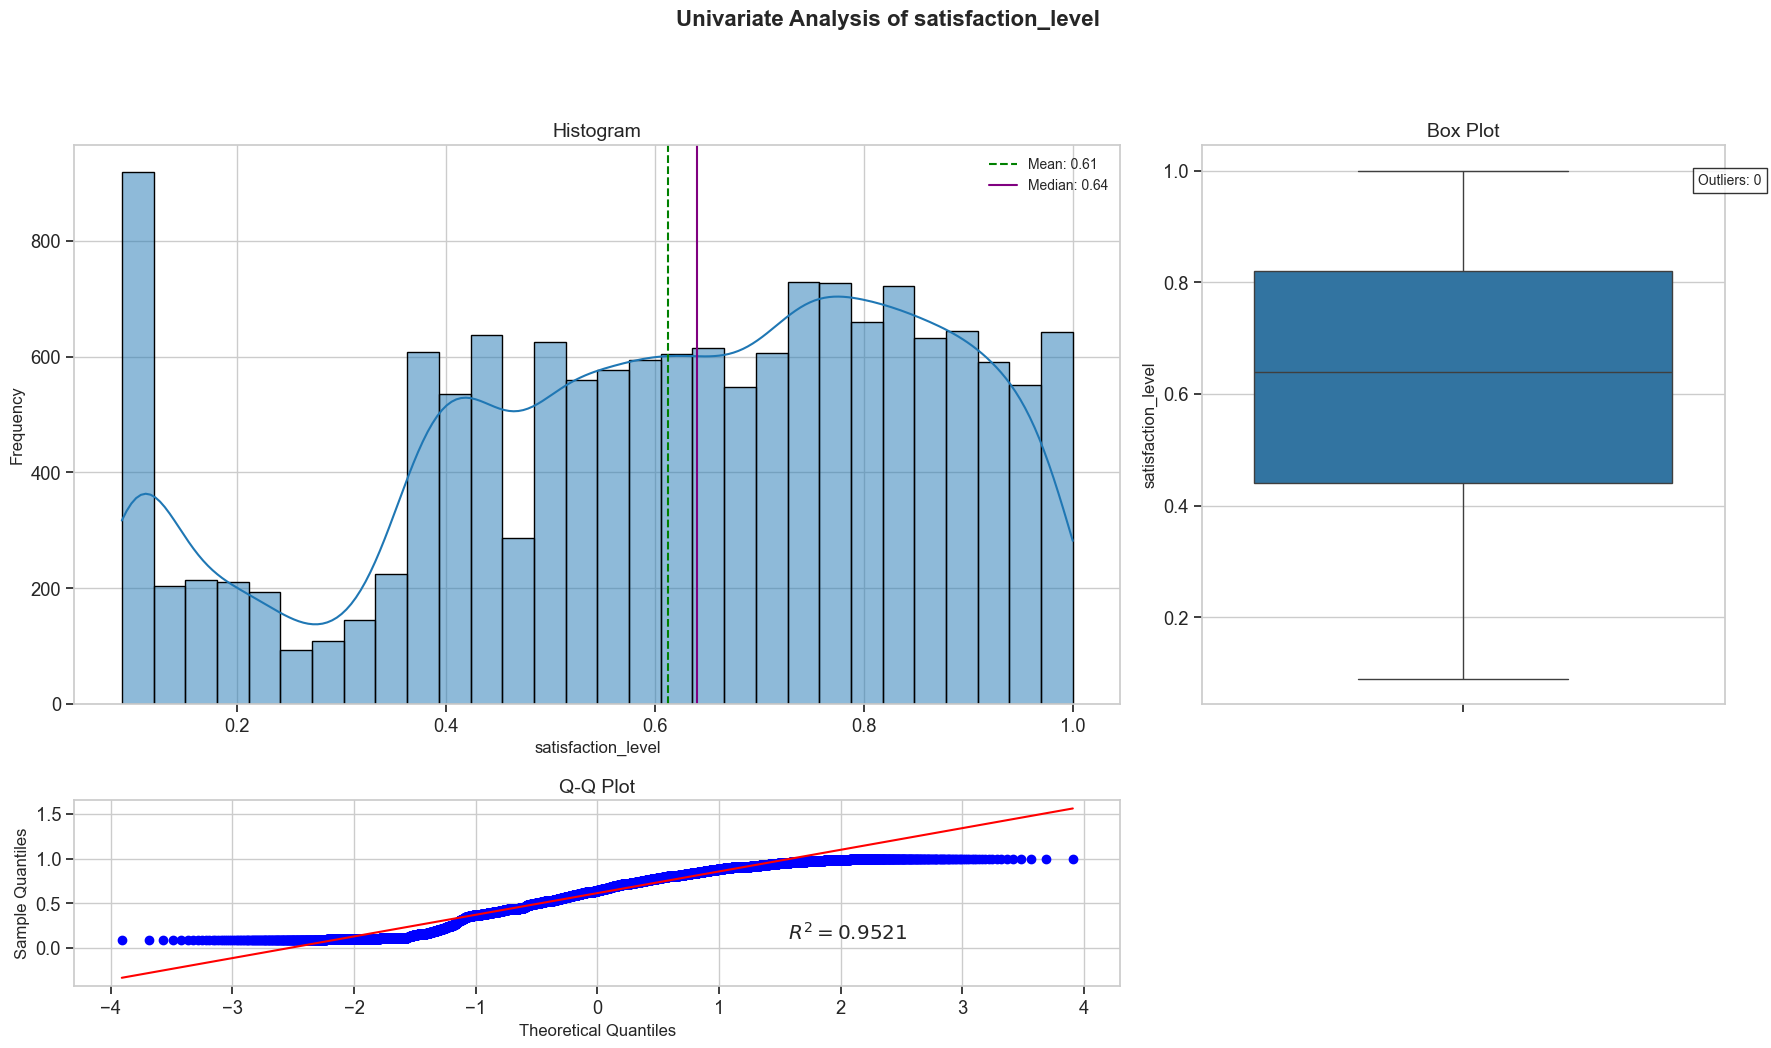


Summary Statistics for last_evaluation:
+----------+----------+
| Metric   |    Value |
|----------+----------|
| Count    | 15004    |
| Mean     |     0.72 |
| Median   |     0.72 |
| Std      |     0.17 |
| Min      |     0.36 |
| Max      |     1    |
| Skewness |    -0.03 |
| Kurtosis |    -1.24 |
+----------+----------+


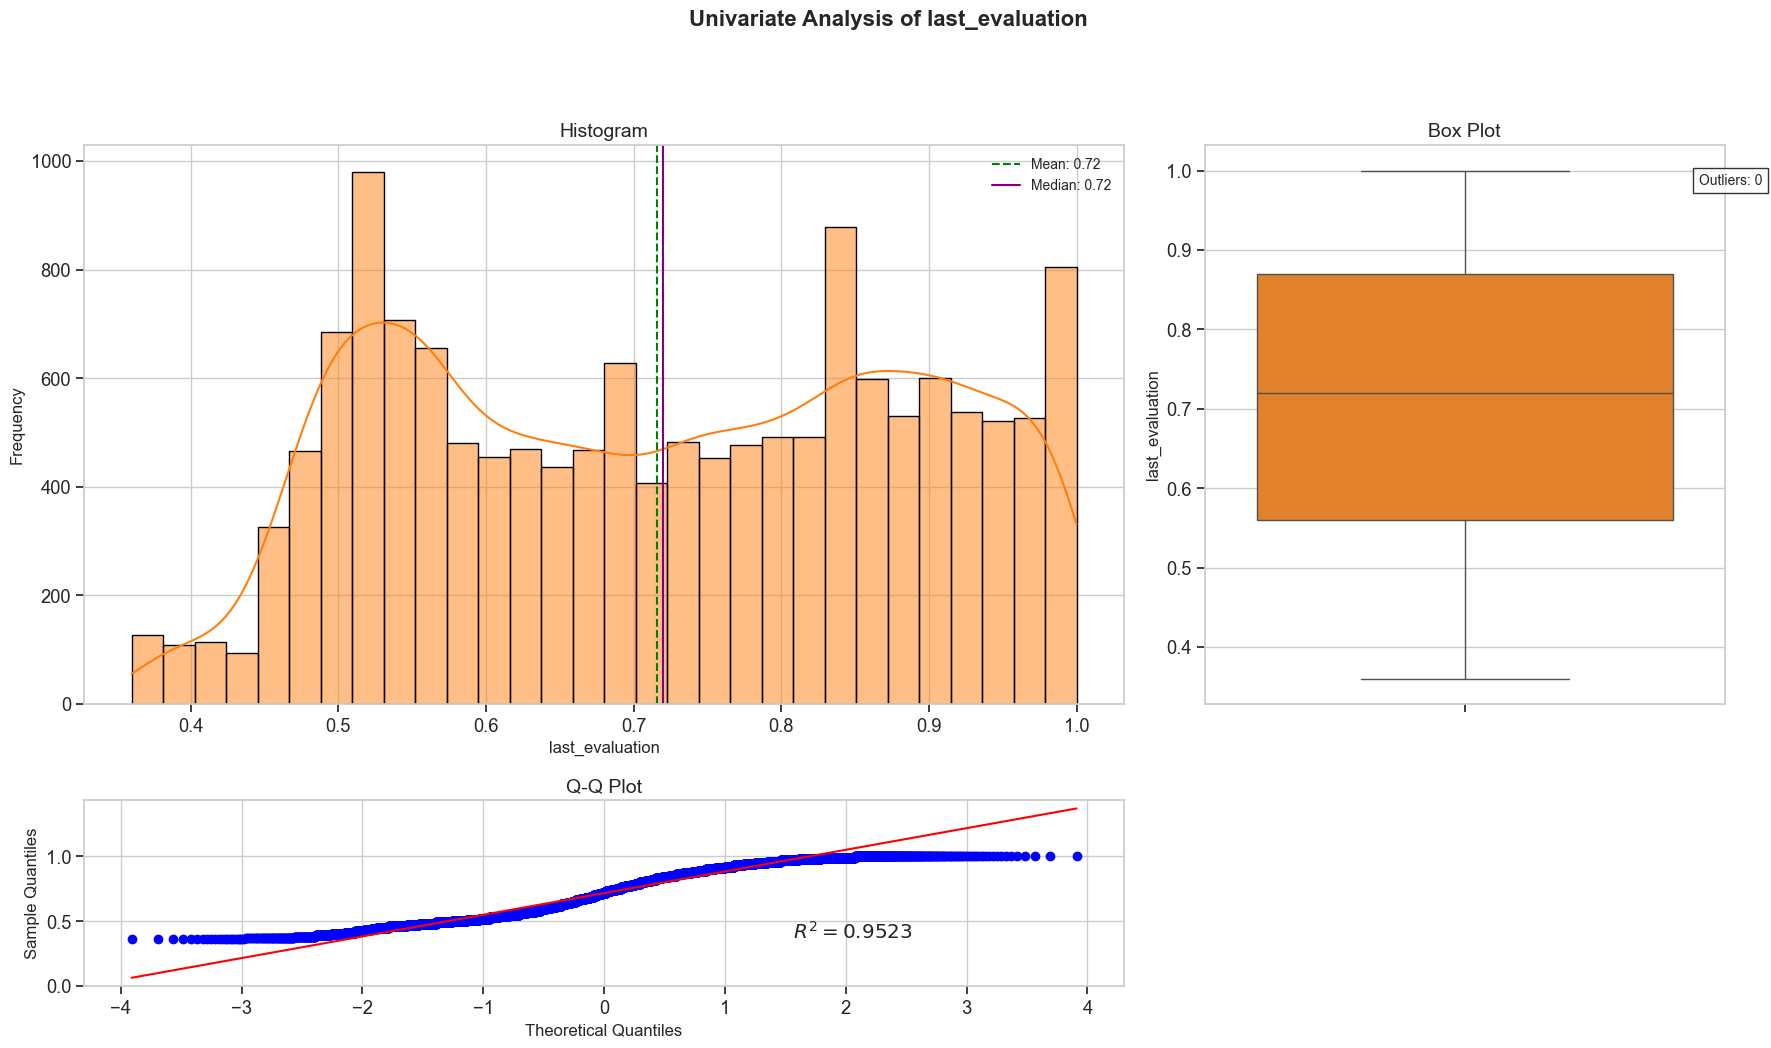


Summary Statistics for average_montly_hours:
+----------+----------+
| Metric   |    Value |
|----------+----------|
| Count    | 15004    |
| Mean     |   201.04 |
| Median   |   200    |
| Std      |    49.95 |
| Min      |    96    |
| Max      |   310    |
| Skewness |     0.05 |
| Kurtosis |    -1.14 |
+----------+----------+


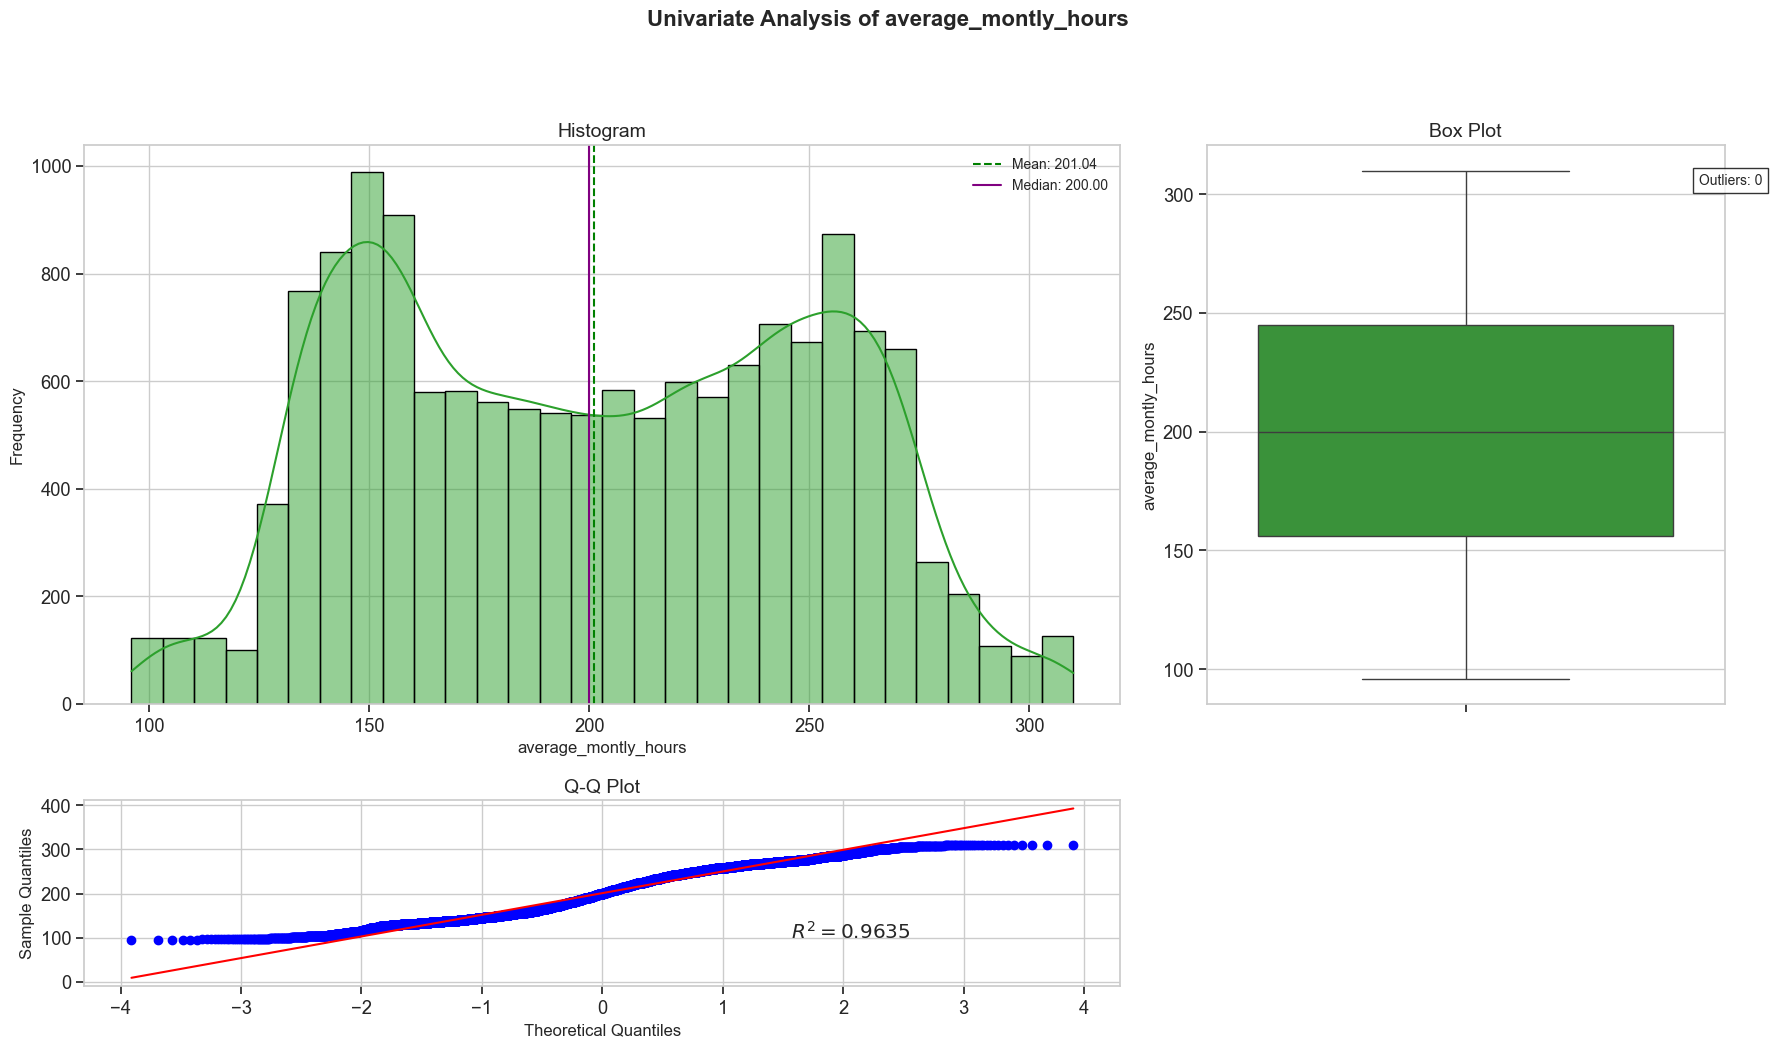

In [13]:
plot_numerical_distributions(df_hr_data, numerical_cols)

### Catigorical Columns Analysis

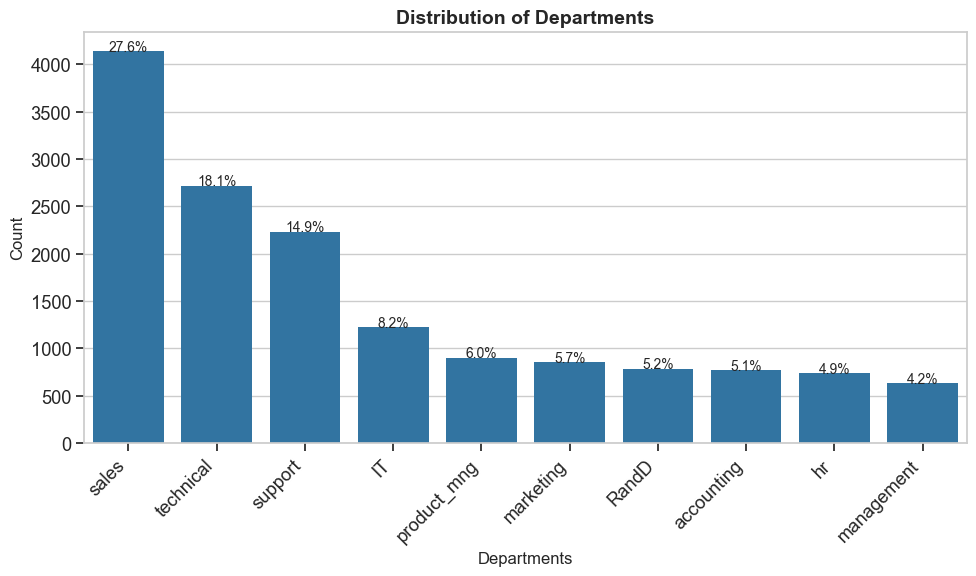


Summary for Departments:
Mode: sales
+-------------+---------+--------------------------+
| Value       |   Count |   Relative Frequency (%) |
|-------------+---------+--------------------------|
| sales       |    4140 |                     27.6 |
| technical   |    2720 |                     18.1 |
| support     |    2234 |                     14.9 |
| IT          |    1227 |                      8.2 |
| product_mng |     902 |                      6   |
| marketing   |     858 |                      5.7 |
| RandD       |     787 |                      5.2 |
| accounting  |     767 |                      5.1 |
| hr          |     739 |                      4.9 |
| management  |     630 |                      4.2 |
+-------------+---------+--------------------------+




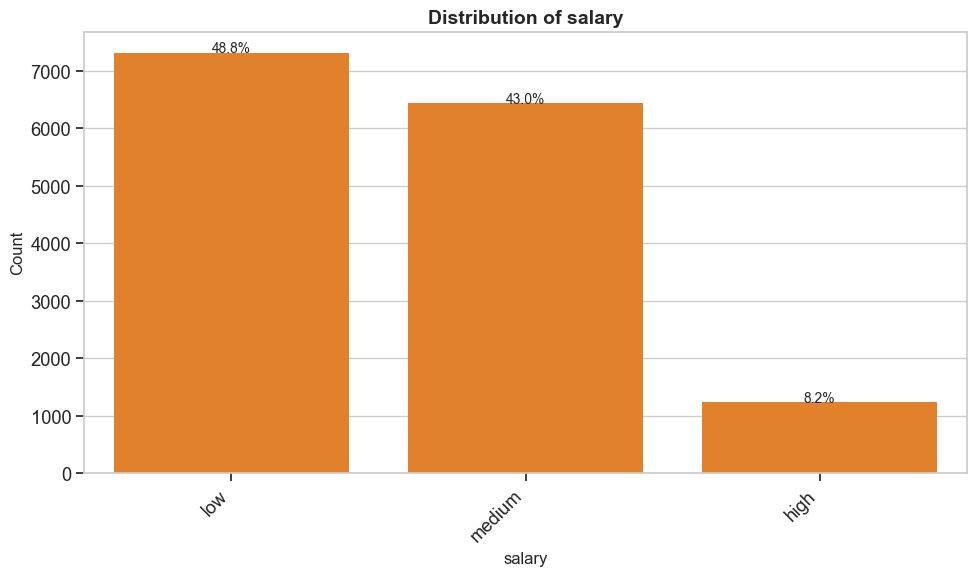


Summary for salary:
Mode: low
+---------+---------+--------------------------+
| Value   |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
| low     |    7321 |                     48.8 |
| medium  |    6446 |                     43   |
| high    |    1237 |                      8.2 |
+---------+---------+--------------------------+




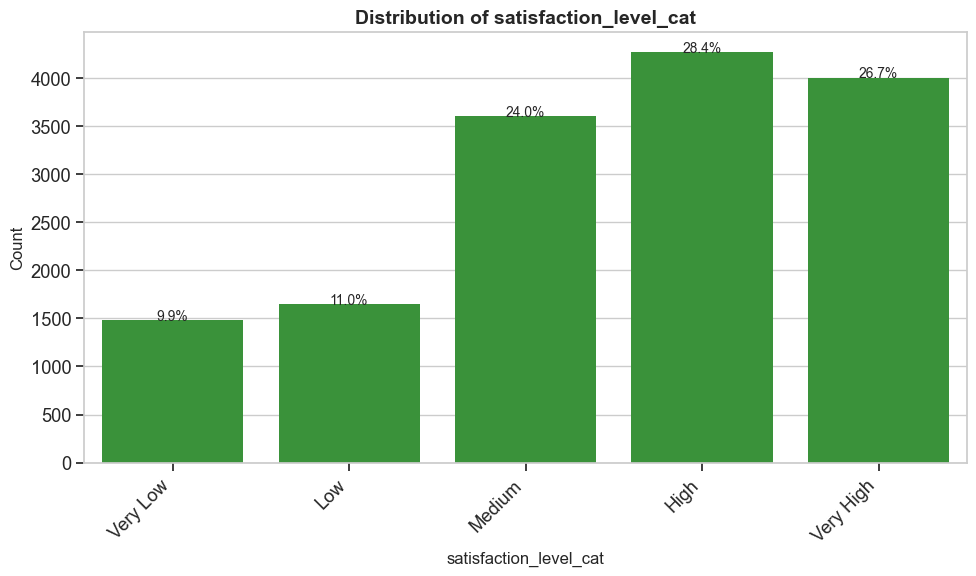


Summary for satisfaction_level_cat:
Mode: High
+-----------+---------+--------------------------+
| Value     |   Count |   Relative Frequency (%) |
|-----------+---------+--------------------------|
| High      |    4268 |                     28.4 |
| Very High |    4002 |                     26.7 |
| Medium    |    3605 |                     24   |
| Low       |    1650 |                     11   |
| Very Low  |    1479 |                      9.9 |
+-----------+---------+--------------------------+




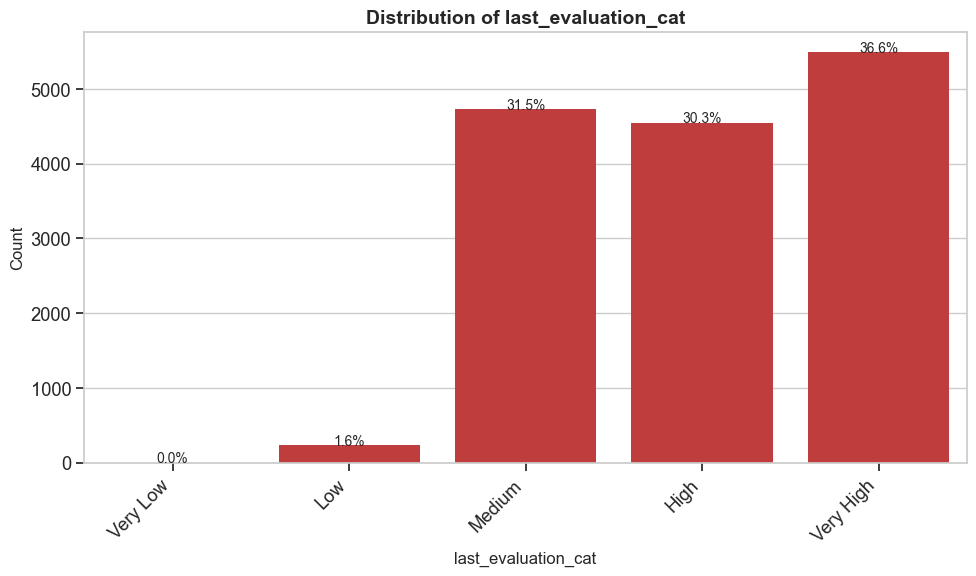


Summary for last_evaluation_cat:
Mode: Very High
+-----------+---------+--------------------------+
| Value     |   Count |   Relative Frequency (%) |
|-----------+---------+--------------------------|
| Very High |    5490 |                     36.6 |
| Medium    |    4731 |                     31.5 |
| High      |    4547 |                     30.3 |
| Low       |     236 |                      1.6 |
| Very Low  |       0 |                      0   |
+-----------+---------+--------------------------+




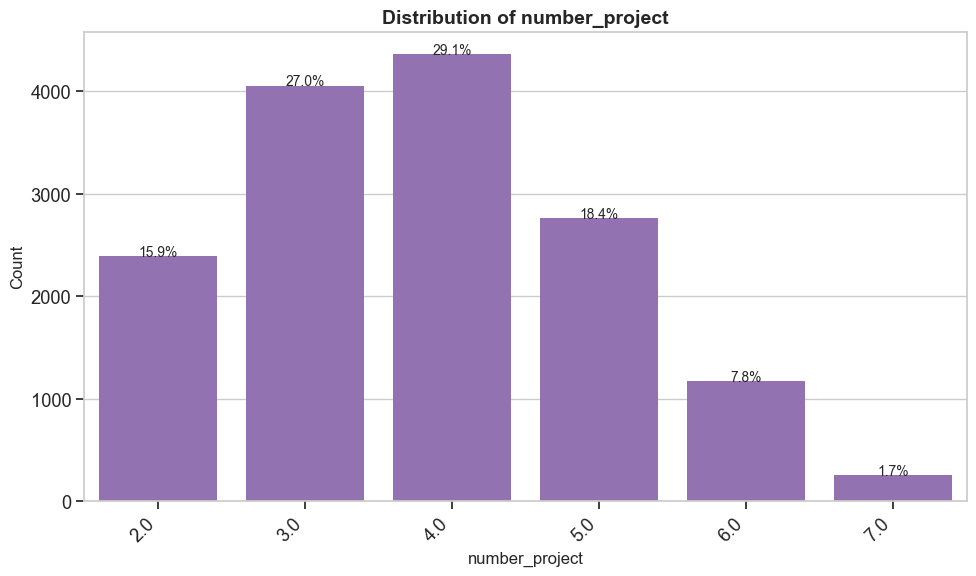


Summary for number_project:
Mode: 4.0
+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       4 |    4365 |                     29.1 |
|       3 |    4055 |                     27   |
|       5 |    2761 |                     18.4 |
|       2 |    2388 |                     15.9 |
|       6 |    1174 |                      7.8 |
|       7 |     256 |                      1.7 |
+---------+---------+--------------------------+




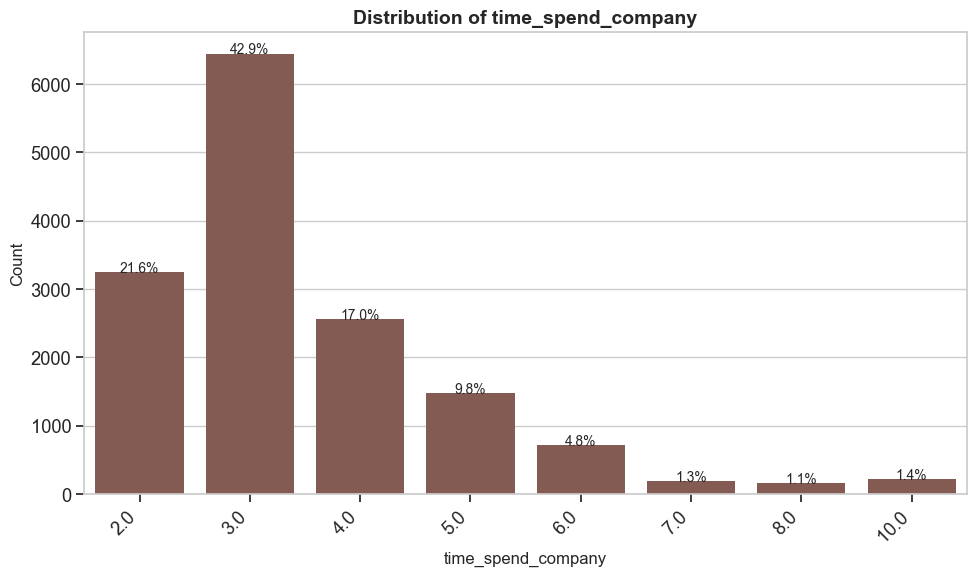


Summary for time_spend_company:
Mode: 3.0
+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       3 |    6443 |                     42.9 |
|       2 |    3244 |                     21.6 |
|       4 |    2557 |                     17   |
|       5 |    1473 |                      9.8 |
|       6 |     718 |                      4.8 |
|      10 |     214 |                      1.4 |
|       7 |     188 |                      1.3 |
|       8 |     162 |                      1.1 |
+---------+---------+--------------------------+




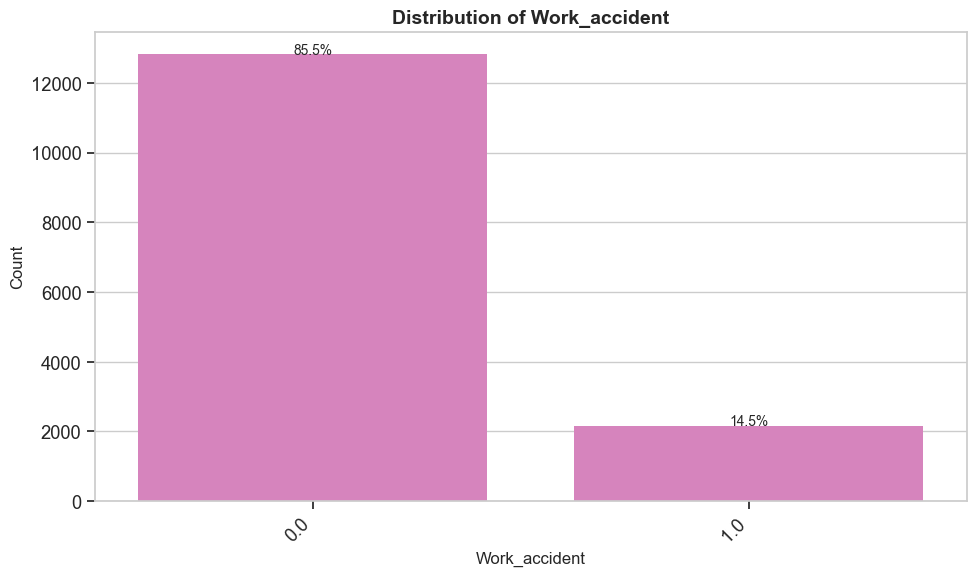


Summary for Work_accident:
Mode: 0.0
+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       0 |   12831 |                     85.5 |
|       1 |    2169 |                     14.5 |
+---------+---------+--------------------------+




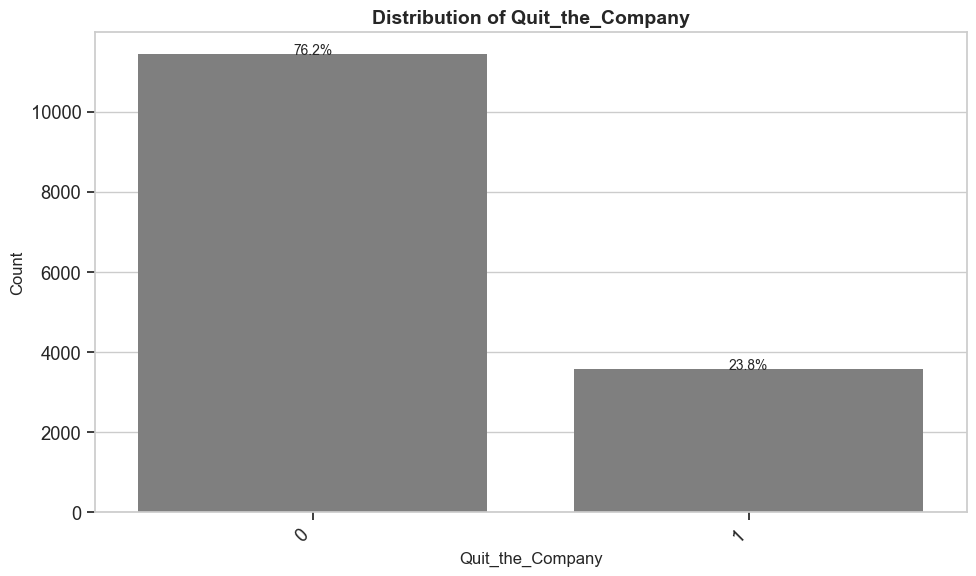


Summary for Quit_the_Company:
Mode: 0
+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       0 |   11428 |                     76.2 |
|       1 |    3576 |                     23.8 |
+---------+---------+--------------------------+




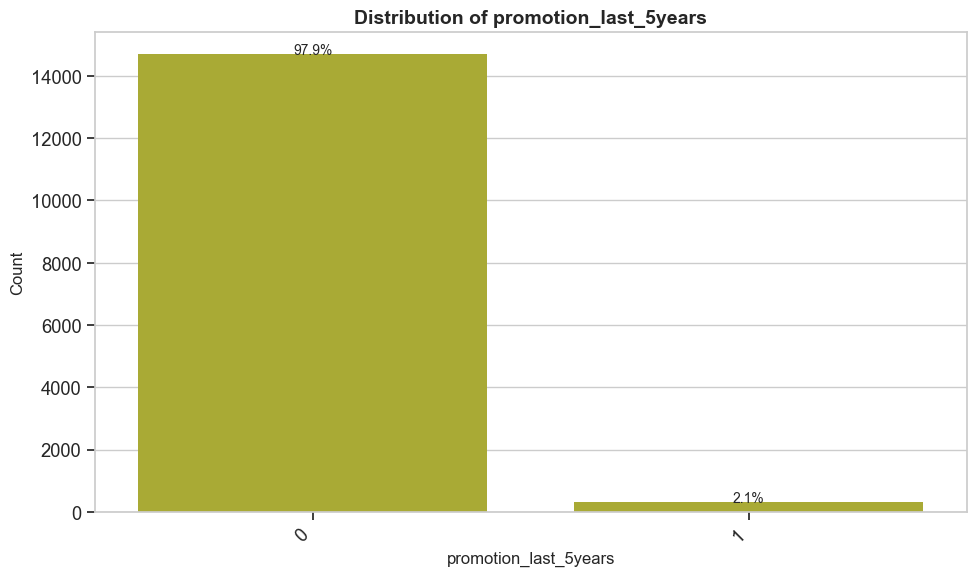


Summary for promotion_last_5years:
Mode: 0
+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       0 |   14685 |                     97.9 |
|       1 |     319 |                      2.1 |
+---------+---------+--------------------------+




In [14]:
plot_categorical_features(df_hr_data, categorical_cols)

## Bivariate Analysis

### Relation Between Satisfaction Level And Churn

+----+--------------------------+--------------------+
|    | satisfaction_level_cat   |   Quit_the_Company |
|----+--------------------------+--------------------|
|  0 | Very Low                 |          0.625423  |
|  1 | Low                      |          0.493939  |
|  2 | Medium                   |          0.239945  |
|  3 | High                     |          0.0988754 |
|  4 | Very High                |          0.137181  |
+----+--------------------------+--------------------+

Contingency Table for satisfaction_level_cat vs Quit_the_Company:
+-----------+------+-----+
|           |    0 |   1 |
|-----------+------+-----|
| Very Low  |  554 | 925 |
| Low       |  835 | 815 |
| Medium    | 2740 | 865 |
| High      | 3846 | 422 |
| Very High | 3453 | 549 |
+-----------+------+-----+


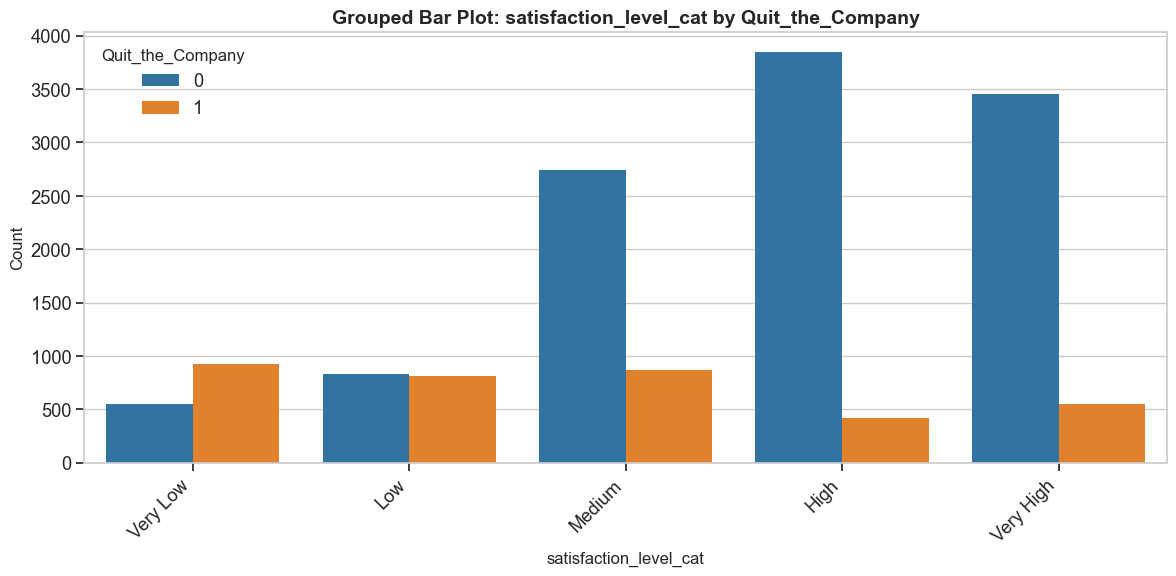

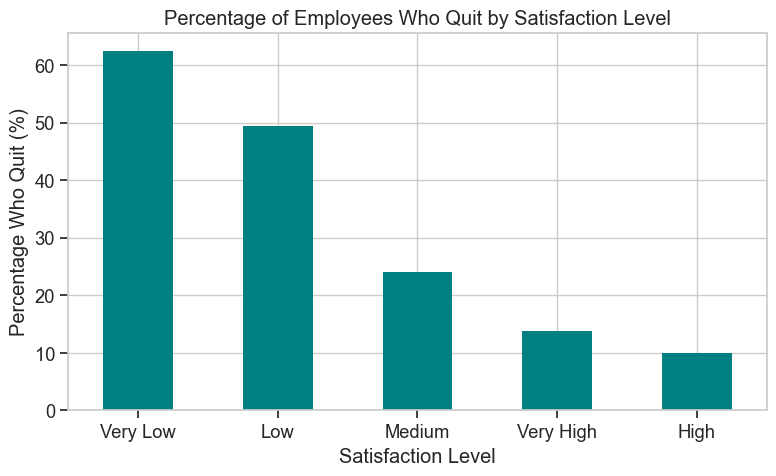

In [19]:
left_satisfaction = df_hr_data.groupby('satisfaction_level_cat')['Quit_the_Company'].mean().reset_index()
print(tabulate(left_satisfaction, headers='keys', tablefmt='psql'))
plot_grouped_barplot(df_hr_data, 'satisfaction_level_cat', 'Quit_the_Company')


plt.figure(figsize=(8, 5))
satisfaction_quit_counts = df_hr_data.groupby('satisfaction_level_cat')['Quit_the_Company'].mean() * 100
satisfaction_quit_counts.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Percentage of Employees Who Quit by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage Who Quit (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Relation Between Department And Churn

+----+---------------+--------------------+
|    | Departments   |   Quit_the_Company |
|----+---------------+--------------------|
|  0 | IT            |            22.2494 |
|  1 | RandD         |            15.3748 |
|  2 | accounting    |            26.5971 |
|  3 | hr            |            29.0934 |
|  4 | management    |            14.4444 |
|  5 | marketing     |            23.6597 |
|  6 | product_mng   |            21.9512 |
|  7 | sales         |            24.4928 |
|  8 | support       |            25.0671 |
|  9 | technical     |            25.625  |
+----+---------------+--------------------+

Contingency Table for Departments vs Quit_the_Company:
+-------------+------+------+
|             |    0 |    1 |
|-------------+------+------|
| IT          |  954 |  273 |
| RandD       |  666 |  121 |
| accounting  |  563 |  204 |
| hr          |  524 |  215 |
| management  |  539 |   91 |
| marketing   |  655 |  203 |
| product_mng |  704 |  198 |
| sales       | 3126 | 1014 

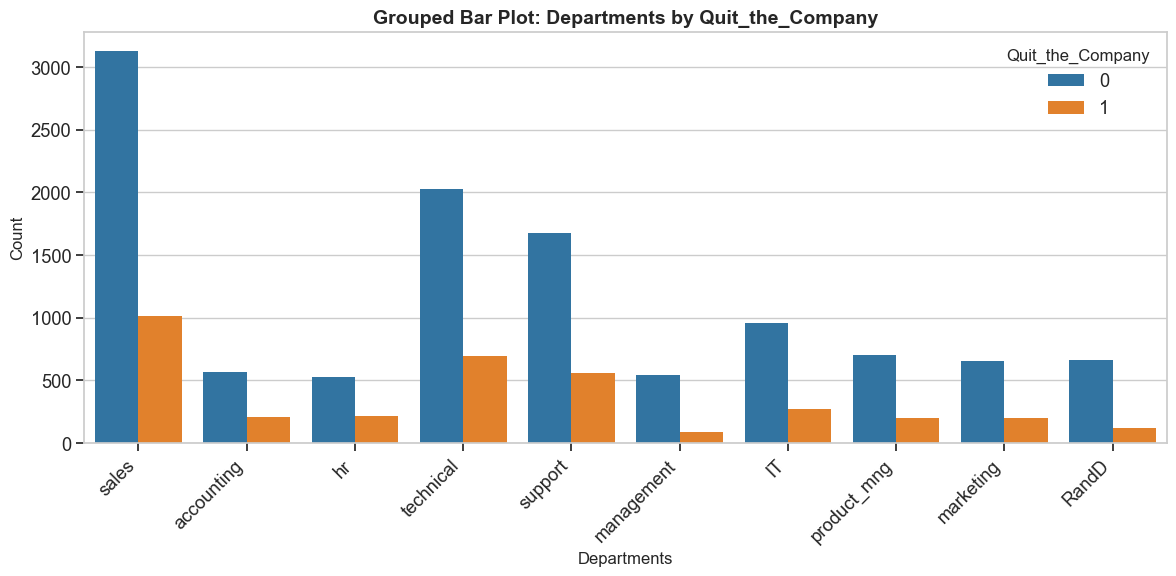

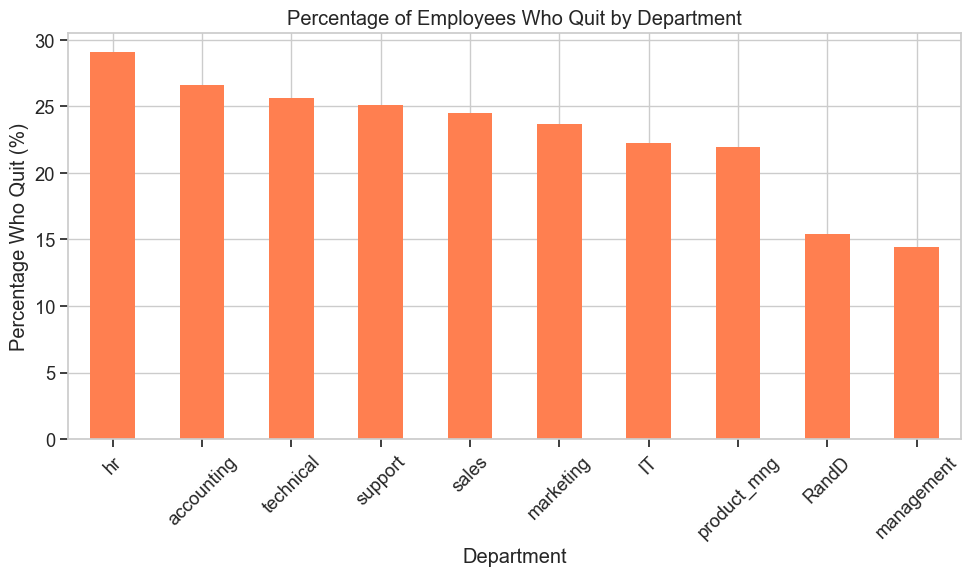

In [20]:
dept_quit = df_hr_data.groupby('Departments')['Quit_the_Company'].mean().reset_index()
dept_quit['Quit_the_Company'] = dept_quit['Quit_the_Company'] * 100
print(tabulate(dept_quit, headers='keys', tablefmt='psql'))
plot_grouped_barplot(df_hr_data, 'Departments', 'Quit_the_Company')
plt.figure(figsize=(10, 6))
dept_quit = df_hr_data.groupby('Departments')['Quit_the_Company'].mean() * 100
dept_quit.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Percentage of Employees Who Quit by Department')
plt.xlabel('Department')
plt.ylabel('Percentage Who Quit (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relation Between Salary Level And Churn

+----+----------+--------------------+
|    | salary   |   Quit_the_Company |
|----+----------+--------------------|
|  0 | high     |            6.62894 |
|  1 | low      |           29.7364  |
|  2 | medium   |           20.4313  |
+----+----------+--------------------+

Contingency Table for salary vs Quit_the_Company:
+--------+------+------+
|        |    0 |    1 |
|--------+------+------|
| high   | 1155 |   82 |
| low    | 5144 | 2177 |
| medium | 5129 | 1317 |
+--------+------+------+


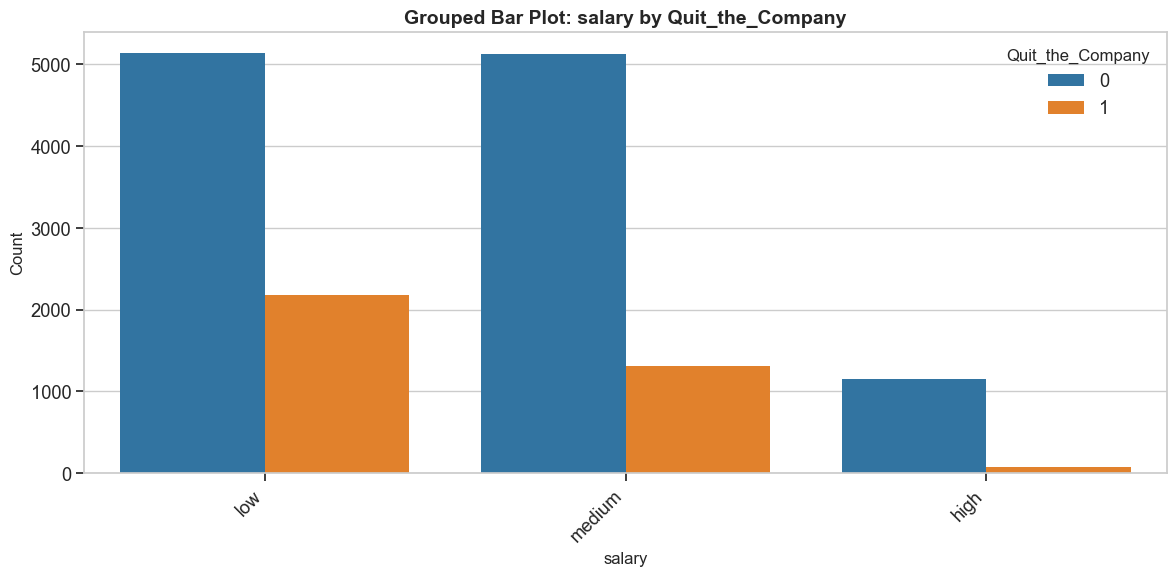

<Figure size 800x500 with 0 Axes>

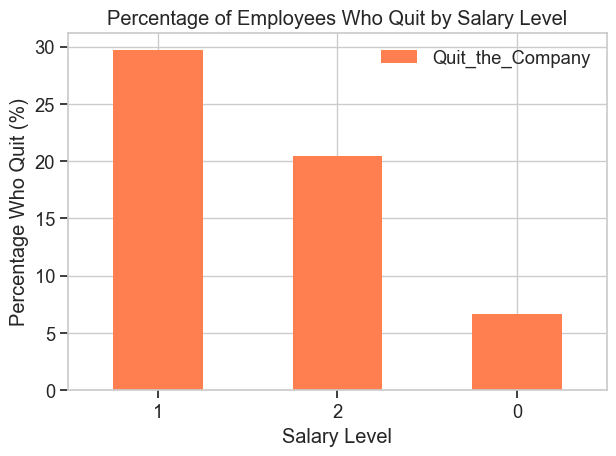

In [24]:
# persenatge of employees who quit by salary level
salary_quit = df_hr_data.groupby('salary')['Quit_the_Company'].mean().reset_index()
salary_quit['Quit_the_Company'] = salary_quit['Quit_the_Company'] * 100
print(tabulate(salary_quit, headers='keys', tablefmt='psql'))
plot_grouped_barplot(df_hr_data, 'salary', 'Quit_the_Company')
plt.figure(figsize=(8, 5))
salary_quit.sort_values(ascending=False , by = "Quit_the_Company").plot(kind='bar', color='coral')
plt.title('Percentage of Employees Who Quit by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Percentage Who Quit (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Relation Between  Last Evaluation And Churn

+----+-----------------------+--------------------+
|    | last_evaluation_cat   |   Quit_the_Company |
|----+-----------------------+--------------------|
|  0 | Very Low              |          nan       |
|  1 | Low                   |            0       |
|  2 | Medium                |           34.2211  |
|  3 | High                  |            5.82802 |
|  4 | Very High             |           30.8197  |
+----+-----------------------+--------------------+

Contingency Table for last_evaluation_cat vs Quit_the_Company:
+-----------+------+------+
|           |    0 |    1 |
|-----------+------+------|
| Low       |  236 |    0 |
| Medium    | 3112 | 1619 |
| High      | 4282 |  265 |
| Very High | 3798 | 1692 |
+-----------+------+------+


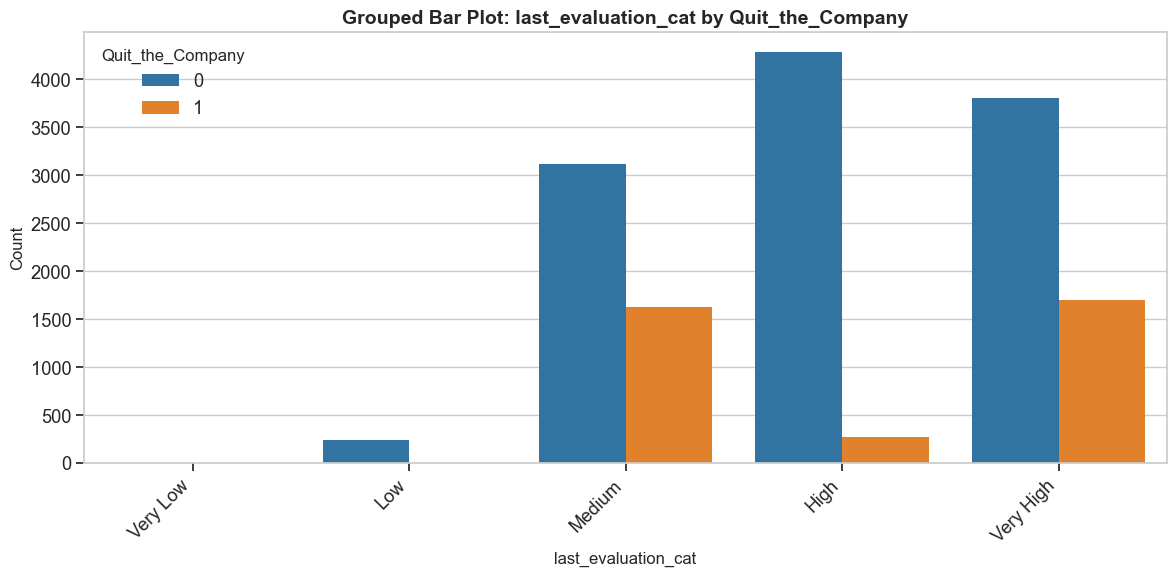

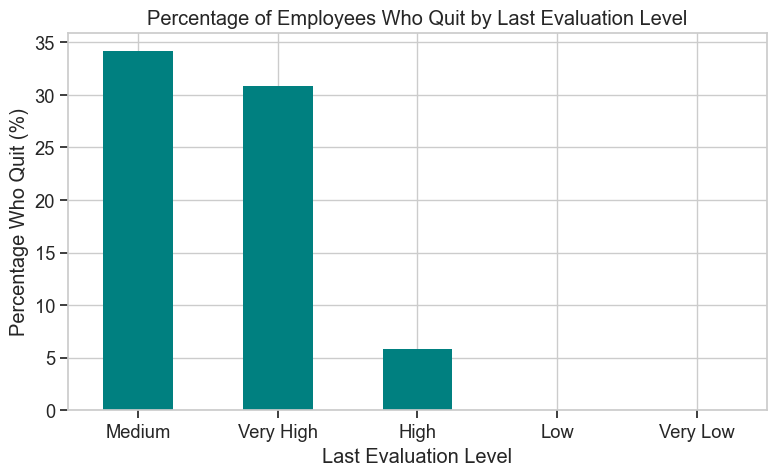

In [26]:
# persenatage of employees who quit by last evaluation level
last_eval_quit = df_hr_data.groupby('last_evaluation_cat')['Quit_the_Company'].mean().reset_index()
last_eval_quit['Quit_the_Company'] = last_eval_quit['Quit_the_Company'] * 100
print(tabulate(last_eval_quit, headers='keys', tablefmt='psql'))
plot_grouped_barplot(df_hr_data, 'last_evaluation_cat', 'Quit_the_Company')
plt.figure(figsize=(8, 5))
satisfaction_quit_counts = df_hr_data.groupby('last_evaluation_cat')['Quit_the_Company'].mean() * 100
satisfaction_quit_counts.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Percentage of Employees Who Quit by Last Evaluation Level')
plt.xlabel('Last Evaluation Level')
plt.ylabel('Percentage Who Quit (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Relation Between  Number Of Projects And Churn

+----+------------------+--------------------+
|    |   number_project |   Quit_the_Company |
|----+------------------+--------------------|
|  0 |                2 |           65.6198  |
|  1 |                3 |            1.77559 |
|  2 |                4 |            9.36999 |
|  3 |                5 |           22.1659  |
|  4 |                6 |           55.7922  |
|  5 |                7 |          100       |
+----+------------------+--------------------+

Contingency Table for number_project vs Quit_the_Company:
+----+------+------+
|    |    0 |    1 |
|----+------+------|
|  2 |  821 | 1567 |
|  3 | 3983 |   72 |
|  4 | 3956 |  409 |
|  5 | 2149 |  612 |
|  6 |  519 |  655 |
|  7 |    0 |  256 |
+----+------+------+


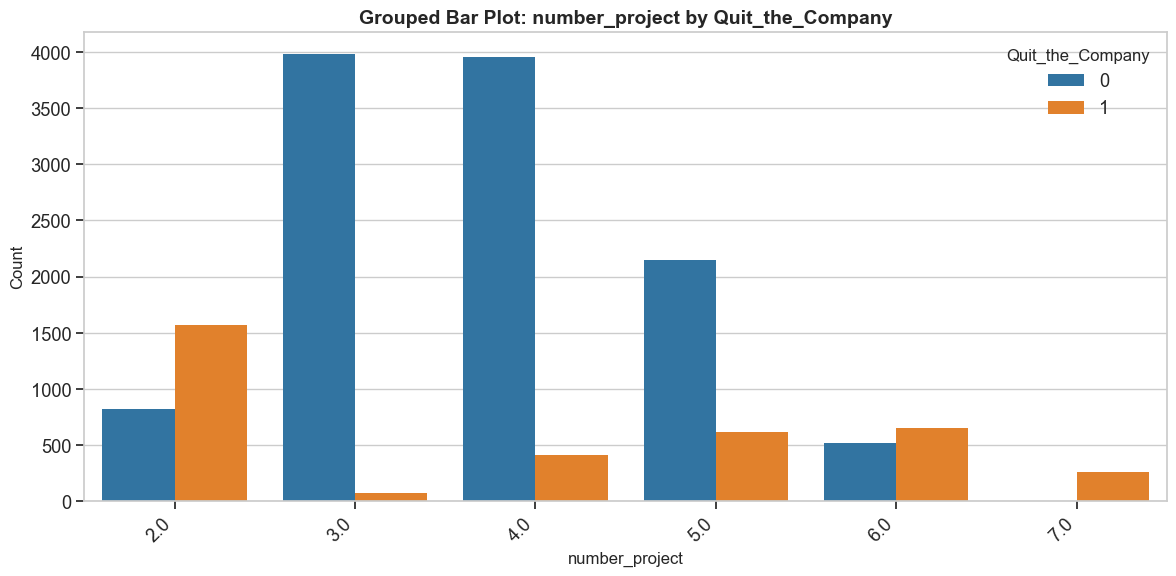

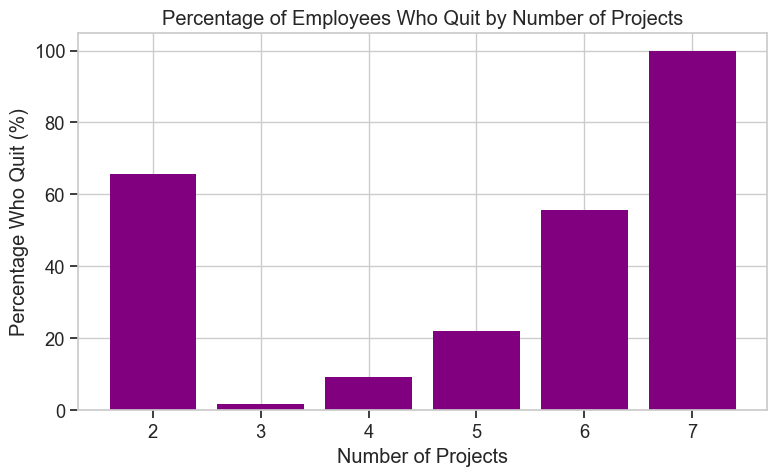

In [30]:
# persenetage of employees who quit by number of projects
projects_quit = df_hr_data.groupby('number_project')['Quit_the_Company'].mean().reset_index()
projects_quit['Quit_the_Company'] = projects_quit['Quit_the_Company'] * 100
print(tabulate(projects_quit, headers='keys', tablefmt='psql'))
plot_grouped_barplot(df_hr_data, 'number_project', 'Quit_the_Company')
plt.figure(figsize=(8, 5))
plt.bar(projects_quit['number_project'], projects_quit['Quit_the_Company'], color='purple')
plt.title('Percentage of Employees Who Quit by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Percentage Who Quit (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Relation Between  Promotion And Churn

+----+-------------------------+--------------------+
|    |   promotion_last_5years |   Quit_the_Company |
|----+-------------------------+--------------------|
|  0 |                       0 |           24.222   |
|  1 |                       1 |            5.95611 |
+----+-------------------------+--------------------+

Contingency Table for promotion_last_5years vs Quit_the_Company:
+----+-------+------+
|    |     0 |    1 |
|----+-------+------|
|  0 | 11128 | 3557 |
|  1 |   300 |   19 |
+----+-------+------+


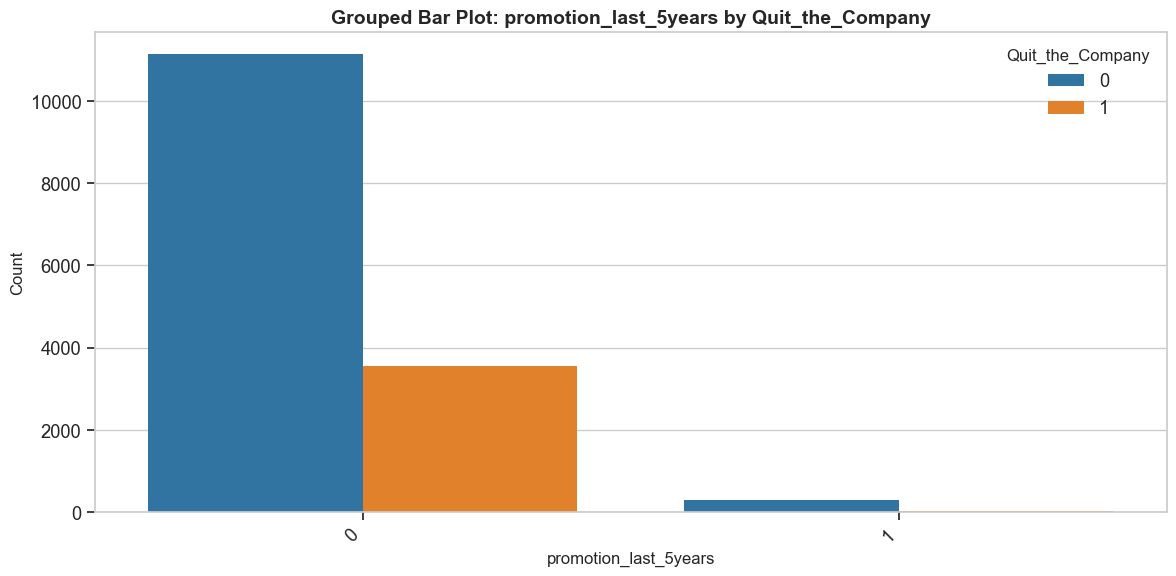

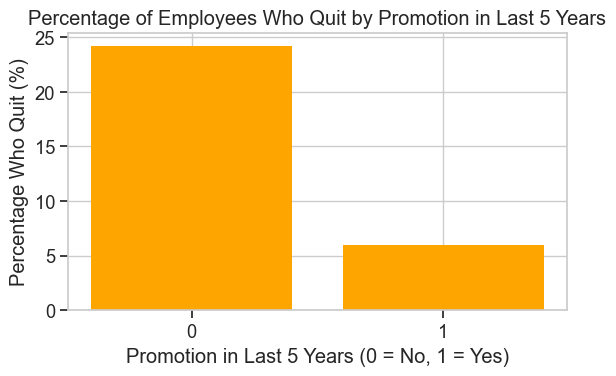

In [32]:
# persentage of employees who quit and got promotion in last 5 years
promo_quit = df_hr_data.groupby('promotion_last_5years')['Quit_the_Company'].mean().reset_index()
promo_quit['Quit_the_Company'] = promo_quit['Quit_the_Company'] * 100
print(tabulate(promo_quit, headers='keys', tablefmt='psql'))
plot_grouped_barplot(df_hr_data, 'promotion_last_5years', 'Quit_the_Company')
plt.figure(figsize=(6, 4))
plt.bar(promo_quit['promotion_last_5years'].astype(str), promo_quit['Quit_the_Company'], color='orange')
plt.title('Percentage of Employees Who Quit by Promotion in Last 5 Years')
plt.xlabel('Promotion in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Percentage Who Quit (%)')
plt.tight_layout()
plt.show()

### Relation Between Time Spend In Company And Churn

+----+----------------------+--------------------+
|    |   time_spend_company |   Quit_the_Company |
|----+----------------------+--------------------|
|  0 |                    2 |            1.63379 |
|  1 |                    3 |           24.6159  |
|  2 |                    4 |           34.8064  |
|  3 |                    5 |           56.5513  |
|  4 |                    6 |           29.1086  |
|  5 |                    7 |            0       |
|  6 |                    8 |            0       |
|  7 |                   10 |            0       |
+----+----------------------+--------------------+

Contingency Table for time_spend_company vs Quit_the_Company:
+----+------+------+
|    |    0 |    1 |
|----+------+------|
|  2 | 3191 |   53 |
|  3 | 4857 | 1586 |
|  4 | 1667 |  890 |
|  5 |  640 |  833 |
|  6 |  509 |  209 |
|  7 |  188 |    0 |
|  8 |  162 |    0 |
| 10 |  214 |    0 |
+----+------+------+


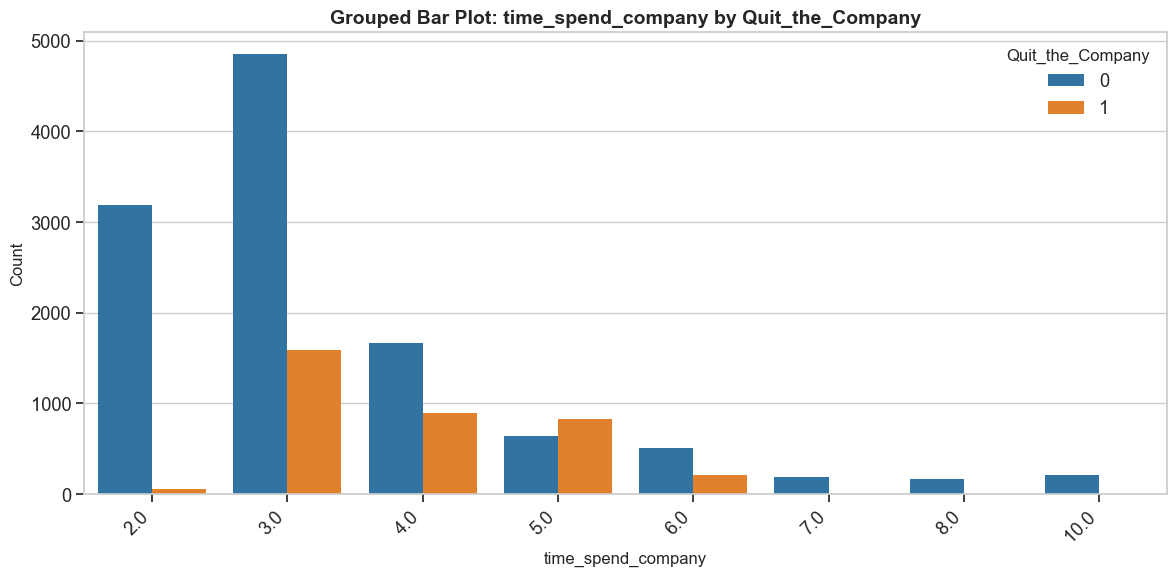

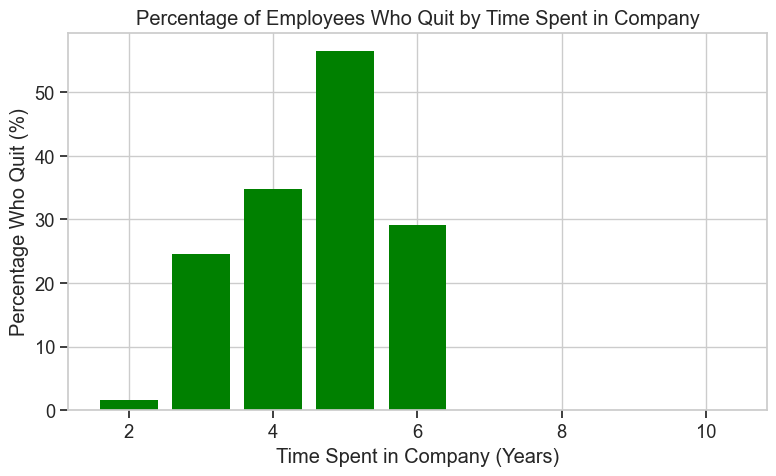

In [34]:
# persenetage of employees who quit time spend in company
time_spend_quit = df_hr_data.groupby('time_spend_company')['Quit_the_Company'].mean().reset_index()
time_spend_quit['Quit_the_Company'] = time_spend_quit['Quit_the_Company'] * 100
print(tabulate(time_spend_quit, headers='keys', tablefmt='psql'))
plot_grouped_barplot(df_hr_data, 'time_spend_company', 'Quit_the_Company')
plt.figure(figsize=(8, 5))
plt.bar(time_spend_quit['time_spend_company'], time_spend_quit['Quit_the_Company'], color='green')
plt.title('Percentage of Employees Who Quit by Time Spent in Company')
plt.xlabel('Time Spent in Company (Years)')
plt.ylabel('Percentage Who Quit (%)')
plt.tight_layout()
plt.show()

### Relation Between Work Accident And Churn

+----+-----------------+--------------------+
|    |   Work_accident |   Quit_the_Company |
|----+-----------------+--------------------|
|  0 |               0 |           26.5217  |
|  1 |               1 |            7.79161 |
+----+-----------------+--------------------+

Contingency Table for Work_accident vs Quit_the_Company:
+----+------+------+
|    |    0 |    1 |
|----+------+------|
|  0 | 9428 | 3403 |
|  1 | 2000 |  169 |
+----+------+------+


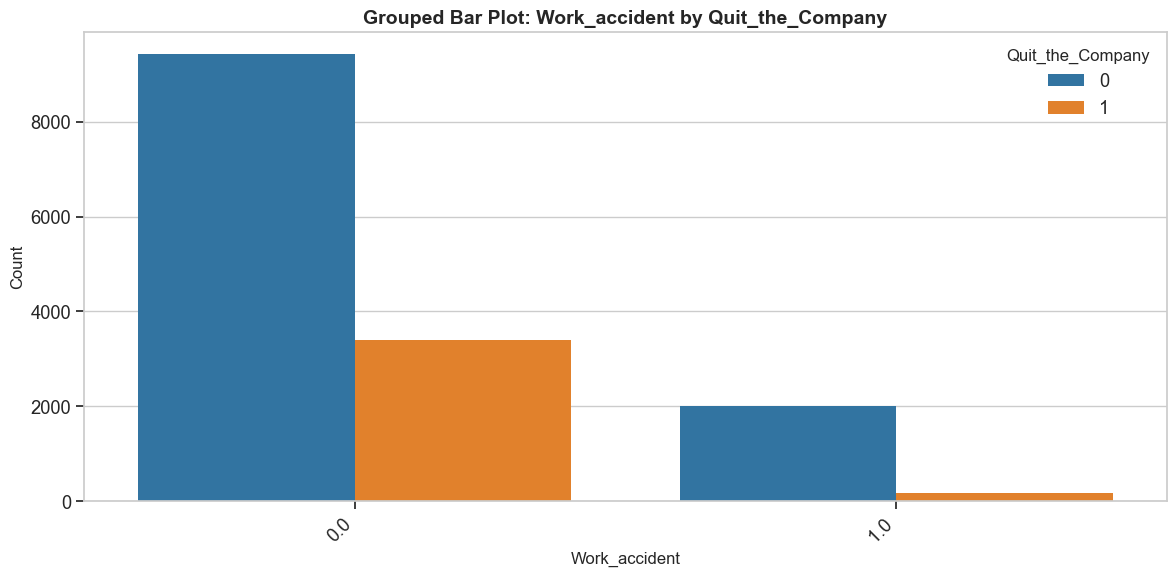

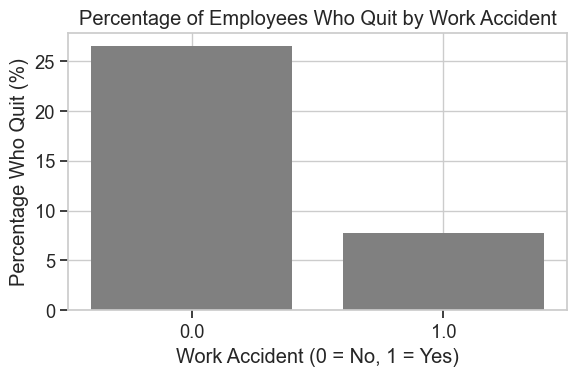

In [38]:
# persentage of employees who left the company and had a work accident
accident_quit = df_hr_data.groupby('Work_accident')['Quit_the_Company'].mean().reset_index()
accident_quit['Quit_the_Company'] = accident_quit['Quit_the_Company'] * 100
print(tabulate(accident_quit, headers='keys', tablefmt='psql'))
plot_grouped_barplot(df_hr_data, 'Work_accident', 'Quit_the_Company')
plt.figure(figsize=(6, 4))
plt.bar(accident_quit['Work_accident'].astype(str), accident_quit['Quit_the_Company'], color='grey')
plt.title('Percentage of Employees Who Quit by Work Accident')
plt.xlabel('Work Accident (0 = No, 1 = Yes)')
plt.ylabel('Percentage Who Quit (%)')
plt.tight_layout()
plt.show()